In [96]:
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [97]:
def ngram_tfidf(sequences):
    #extract n gram from original sequences
    count_vect = CountVectorizer(lowercase=False, ngram_range=(4,4), analyzer='char')
    
    X1 = count_vect.fit_transform(sequences)
    
    lcount = []
    cnt_line = 0
    for s in sequences:
        print(cnt_line)
        cnt_line += 1
        lcount.append(len(s))
        count_vect_df = pd.DataFrame(X1.todense(), columns = count_vect.get_feature_names())
    #compute tf-idf value
    count_vect_df = count_vect_df.apply(lambda x: x / lcount[x.name] ,axis=1)
        
    return count_vect_df

In [98]:
def process_file(filename, target):
    f = open(filename)
    s1 = []
    seqs = ""
    for line in f:
        if line[0] != '>':
            line = line.strip()
            seqs += line
        else:
            if seqs:
                s1.append(seqs)
                seqs = ""
    count_vect_df = ngram_tfidf(s1) 
    count_vect_df['target'] = target
    return count_vect_df

In [99]:
df1 = process_file('chicken.fasta','chicken')
df2 = process_file('camel.fasta','camel')
df3 = process_file('pangolin.fasta','pangolin')
df4 = process_file('bat.fasta','bat')
df5 = process_file('monkey.fasta','monkey')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703


5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345


6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984


1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731


3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370


4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010


6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652


1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345


2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987


In [62]:
print(len(df1), len(df2),len(df3),len(df4),len(df5))

7116 7168 6 4093 5


In [100]:
df1s = df1
df1s = df1s.sample(n=4000,random_state=123,axis=0)

df2s = df2
df2s = df2s.sample(n=4000,random_state=123,axis=0)

len(df1s), len(df2s)

(4000, 4000)

In [101]:
print(len(df1s), len(df2s),len(df3),len(df4),len(df5))

4000 4000 6 4093 5


In [102]:
df7 = pd.concat([df1s, df2s, df3, df4, df5])

In [103]:
df7

,AAAA,AAAC,AAAG,AAAK,AAAM,AAAN,AAAR,AAAT,AAAY,AACA,...,YWRY,YWWK,YWYW,YYAC,YYCA,YYCT,YYTA,YYTC,YYWA,target
5540,0.004427,0.003320,0.002214,NaN,NaN,0.0,0.0,0.004427,0.0,0.003320,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
2295,0.000000,0.011869,0.002967,NaN,NaN,0.0,0.0,0.002967,0.0,0.011869,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
3159,0.002633,0.003292,0.004608,NaN,NaN,0.0,0.0,0.005925,0.0,0.005925,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
6892,0.008671,0.002890,0.005780,NaN,NaN,0.0,0.0,0.005780,0.0,0.005780,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
2156,0.002825,0.008475,0.005650,NaN,NaN,0.0,0.0,0.000000,0.0,0.005650,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
4005,0.008571,0.002857,0.005714,NaN,NaN,0.0,0.0,0.005714,0.0,0.000000,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
4807,0.002469,0.003086,0.004321,NaN,NaN,0.0,0.0,0.004938,0.0,0.006790,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
765,0.000000,0.016194,0.000000,NaN,NaN,0.0,0.0,0.004049,0.0,0.008097,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
2464,0.002488,0.003731,0.003109,NaN,NaN,0.0,0.0,0.004353,0.0,0.006219,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken
6708,0.004305,0.006765,0.003075,NaN,NaN,0.0,0.0,0.006765,0.0,0.008610,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,chicken


In [67]:
#df7.isnull().sum()
df7.dropna(axis=1, how='any', thresh=9000, inplace=True)

In [68]:
df7

,AAAA,AAAC,AAAG,AAAN,AAAR,AAAT,AAAY,AACA,AACC,AACG,...,YTAT,YTCA,YTCC,YTGC,YTGG,YTGT,YTTA,YTTG,YTTT,target
5540,0.004427,0.003320,0.002214,0.0,0.0,0.004427,0.0,0.003320,0.003320,0.001660,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
2295,0.000000,0.011869,0.002967,0.0,0.0,0.002967,0.0,0.011869,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
3159,0.002633,0.003292,0.004608,0.0,0.0,0.005925,0.0,0.005925,0.000658,0.001317,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
6892,0.008671,0.002890,0.005780,0.0,0.0,0.005780,0.0,0.005780,0.000000,0.005780,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
2156,0.002825,0.008475,0.005650,0.0,0.0,0.000000,0.0,0.005650,0.002825,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
4005,0.008571,0.002857,0.005714,0.0,0.0,0.005714,0.0,0.000000,0.002857,0.002857,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
4807,0.002469,0.003086,0.004321,0.0,0.0,0.004938,0.0,0.006790,0.002469,0.001235,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
765,0.000000,0.016194,0.000000,0.0,0.0,0.004049,0.0,0.008097,0.004049,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
2464,0.002488,0.003731,0.003109,0.0,0.0,0.004353,0.0,0.006219,0.003109,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken
6708,0.004305,0.006765,0.003075,0.0,0.0,0.006765,0.0,0.008610,0.002460,0.001230,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,chicken


bat         4093
camel       4000
chicken     4000
pangolin       6
monkey         5
Name: target, dtype: int64


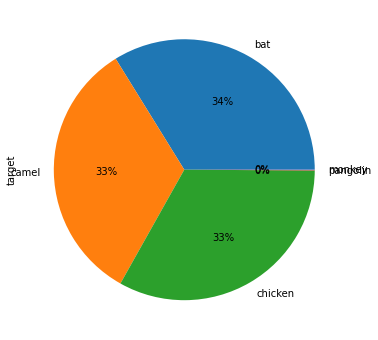

In [69]:
import matplotlib.pyplot as plt
plot_size = plt.rcParams['figure.figsize']
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams['figure.figsize'] = plot_size
df7['target'].value_counts().plot(kind='pie', autopct='%1.0f%%')
print(df7['target'].value_counts())

In [70]:
X = df7.iloc[:,0:-1]

In [71]:
y = df7['target']

In [72]:
def plot_show(df7, X_vis):
    red_x, red_y = [], []
    blue_x, blue_y = [], []
    green_x, green_y = [], []
    yellow_x, yellow_y = [], []
    black_x, black_y = [], []

    i = 0
    for index, row in df7.iterrows():
        if row['target'] == 'chicken':
            red_x.append(X_vis[i][0])
            red_y.append(X_vis[i][1])
        if row['target'] == 'camel':
            blue_x.append(X_vis[i][0])
            blue_y.append(X_vis[i][1])
        if row['target'] == 'pangolin':
            green_x.append(X_vis[i][0])
            green_y.append(X_vis[i][1])
        if row['target'] == 'bat':
            yellow_x.append(X_vis[i][0])
            yellow_y.append(X_vis[i][1])
        if row['target'] == 'monkey':
            black_x.append(X_vis[i][0])
            black_y.append(X_vis[i][1])

        i += 1
    plt.scatter(red_x, red_y, c='r', marker='x')
    plt.scatter(blue_x, blue_y, c='b', marker='x')
    plt.scatter(green_x, green_y, c='g', marker='x')
    plt.scatter(yellow_x, yellow_y, c='yellow', marker='x')
    plt.scatter(black_x, black_y, c='black', marker='x')
    plt.show()

In [73]:
XX = X.fillna(0)
yy = y

pca=PCA(n_components=2)
X_vis=pca.fit_transform(XX)

#plot_show(df7, X_vis)

sm=SMOTE(k_neighbors=2)
X_resampled, y_resampled_SMOTE=sm.fit_sample(XX, yy)

X_res_vis_SMOTE=pca.transform(X_resampled)

In [74]:
X_resampled['target'] = y_resampled_SMOTE
X_resampled

,AAAA,AAAC,AAAG,AAAN,AAAR,AAAT,AAAY,AACA,AACC,AACG,...,YTAT,YTCA,YTCC,YTGC,YTGG,YTGT,YTTA,YTTG,YTTT,target
0,0.004427,0.003320,0.002214,0.000000,0.0,0.004427,0.0,0.003320,0.003320,0.001660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
1,0.000000,0.011869,0.002967,0.000000,0.0,0.002967,0.0,0.011869,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
2,0.002633,0.003292,0.004608,0.000000,0.0,0.005925,0.0,0.005925,0.000658,0.001317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
3,0.008671,0.002890,0.005780,0.000000,0.0,0.005780,0.0,0.005780,0.000000,0.005780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
4,0.002825,0.008475,0.005650,0.000000,0.0,0.000000,0.0,0.005650,0.002825,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
5,0.008571,0.002857,0.005714,0.000000,0.0,0.005714,0.0,0.000000,0.002857,0.002857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
6,0.002469,0.003086,0.004321,0.000000,0.0,0.004938,0.0,0.006790,0.002469,0.001235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
7,0.000000,0.016194,0.000000,0.000000,0.0,0.004049,0.0,0.008097,0.004049,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
8,0.002488,0.003731,0.003109,0.000000,0.0,0.004353,0.0,0.006219,0.003109,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken
9,0.004305,0.006765,0.003075,0.000000,0.0,0.006765,0.0,0.008610,0.002460,0.001230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,chicken


pangolin    4093
bat         4093
camel       4093
monkey      4093
chicken     4093
Name: target, dtype: int64


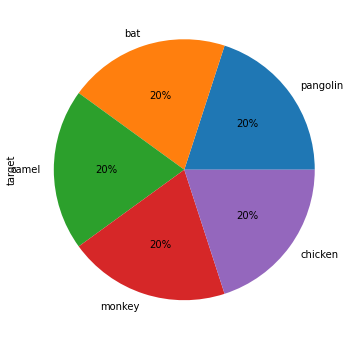

In [75]:
import matplotlib.pyplot as plt
plot_size = plt.rcParams['figure.figsize']
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams['figure.figsize'] = plot_size
X_resampled['target'].value_counts().plot(kind='pie', autopct='%1.0f%%')
print(X_resampled['target'].value_counts())

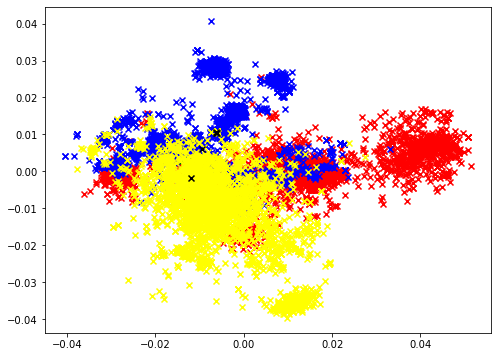

In [76]:
plot_show(df7, X_vis)

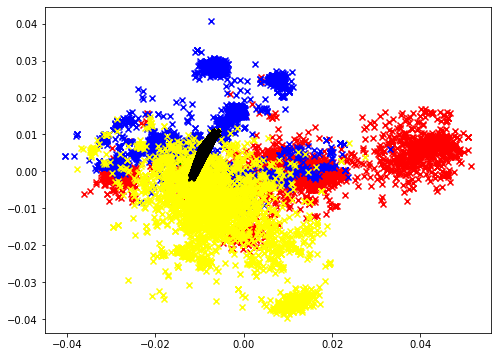

In [77]:
plot_show(X_resampled, X_res_vis_SMOTE)

In [78]:
X = X_resampled.iloc[:,0:-1]
y = X_resampled['target']

In [79]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost# create a train/test split
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)
model = XGBClassifier(learning_rate=0.3, colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1)

from sklearn.naive_bayes import BernoulliNB
#model = BernoulliNB()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

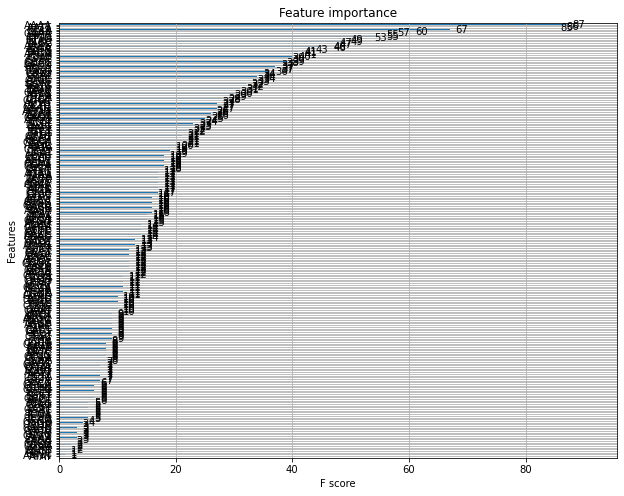

In [80]:
ax1 = plot_importance(model)
ax1.figure.set_size_inches(10, 8)

In [81]:
pred = model.predict(X_test)
import sklearn
print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         bat       0.99      0.99      0.99       845
       camel       0.99      0.99      0.99       795
     chicken       1.00      0.99      1.00       770
      monkey       1.00      1.00      1.00       845
    pangolin       1.00      1.00      1.00       838

    accuracy                           1.00      4093
   macro avg       1.00      1.00      1.00      4093
weighted avg       1.00      1.00      1.00      4093



In [84]:
cov = process_file('human.fasta','COVID-19')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [85]:
cov

,AAAA,AAAC,AAAD,AAAG,AAAH,AAAN,AAAR,AAAT,AAAV,AAAY,...,YTCG,YTGA,YTGC,YTGG,YTTA,YTTC,YTTG,YTTT,YYTA,target
0,0.009000,0.006424,0.0,0.006859,0.0,0.0,0.0,0.008164,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
1,0.008999,0.006423,0.0,0.006858,0.0,0.0,0.0,0.008163,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
2,0.008999,0.006390,0.0,0.006858,0.0,0.0,0.0,0.008230,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
3,0.008999,0.006390,0.0,0.006858,0.0,0.0,0.0,0.008230,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
4,0.009007,0.006395,0.0,0.006830,0.0,0.0,0.0,0.008203,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
5,0.008999,0.006390,0.0,0.006858,0.0,0.0,0.0,0.008196,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
6,0.008999,0.006390,0.0,0.006858,0.0,0.0,0.0,0.008196,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
7,0.008874,0.006396,0.0,0.006831,0.0,0.0,0.0,0.008204,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
8,0.008999,0.006390,0.0,0.006858,0.0,0.0,0.0,0.008196,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19
9,0.009400,0.006389,0.0,0.006857,0.0,0.0,0.0,0.008195,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COVID-19


In [86]:
cov = cov.drop('target', axis=1)

In [87]:
mc = X_train.columns.difference(cov.columns)

In [88]:
mc

Index(['AACM', 'AACR', 'AAKT', 'AARC', 'AART', 'AATY', 'AAWG', 'ACAR', 'ACCM',
       'ACKT',
       ...
       'YGAA', 'YGAG', 'YGCY', 'YGGA', 'YGGC', 'YGGT', 'YGTA', 'YTAG', 'YTCA',
       'YTGT'],
      dtype='object', length=285)

In [89]:
for newcol in mc: cov[newcol]= 0

In [90]:
rf = cov.columns.difference(X_train.columns)
cov = cov.drop(rf, axis=1)

In [91]:
cov

,AAAA,AAAC,AAAG,AAAN,AAAR,AAAT,AAAY,AACA,AACC,AACG,...,YGAA,YGAG,YGCY,YGGA,YGGC,YGGT,YGTA,YTAG,YTCA,YTGT
0,0.009000,0.006424,0.006859,0.0,0.0,0.008164,0.0,0.008565,0.003848,0.001506,...,0,0,0,0,0,0,0,0,0,0
1,0.008999,0.006423,0.006858,0.0,0.0,0.008163,0.0,0.008564,0.003847,0.001505,...,0,0,0,0,0,0,0,0,0,0
2,0.008999,0.006390,0.006858,0.0,0.0,0.008230,0.0,0.008564,0.003847,0.001505,...,0,0,0,0,0,0,0,0,0,0
3,0.008999,0.006390,0.006858,0.0,0.0,0.008230,0.0,0.008564,0.003847,0.001505,...,0,0,0,0,0,0,0,0,0,0
4,0.009007,0.006395,0.006830,0.0,0.0,0.008203,0.0,0.008571,0.003817,0.001507,...,0,0,0,0,0,0,0,0,0,0
5,0.008999,0.006390,0.006858,0.0,0.0,0.008196,0.0,0.008564,0.003814,0.001505,...,0,0,0,0,0,0,0,0,0,0
6,0.008999,0.006390,0.006858,0.0,0.0,0.008196,0.0,0.008564,0.003847,0.001505,...,0,0,0,0,0,0,0,0,0,0
7,0.008874,0.006396,0.006831,0.0,0.0,0.008204,0.0,0.008572,0.003851,0.001507,...,0,0,0,0,0,0,0,0,0,0
8,0.008999,0.006390,0.006858,0.0,0.0,0.008196,0.0,0.008531,0.003847,0.001505,...,0,0,0,0,0,0,0,0,0,0
9,0.009400,0.006389,0.006857,0.0,0.0,0.008195,0.0,0.008563,0.003847,0.001505,...,0,0,0,0,0,0,0,0,0,0


In [92]:
cov = cov[X_train.columns]

In [93]:
pred = model.predict(cov)

In [94]:
import numpy as np
print(model.classes_)
similarities = model.predict_proba(cov)
np.round(similarities, 3)

['bat' 'camel' 'chicken' 'monkey' 'pangolin']


array([[0.153, 0.096, 0.223, 0.015, 0.513],
       [0.159, 0.096, 0.222, 0.015, 0.509],
       [0.165, 0.091, 0.221, 0.015, 0.508],
       ...,
       [0.152, 0.101, 0.222, 0.015, 0.51 ],
       [0.998, 0.001, 0.   , 0.   , 0.   ],
       [0.998, 0.001, 0.   , 0.   , 0.   ]], dtype=float32)

In [95]:
camel = 0
bat = 0
chicken = 0
monkey = 0
pangolin = 0
for i in range(len(pred)):
    if pred[i] == 'camel':
        camel += 1
    if pred[i] == 'chicken':
        chicken += 1
    if pred[i] == 'bat':
        bat += 1
    if pred[i] == 'pangolin':
        pangolin += 1
    if pred[i] == 'monkey':
        monkey += 1
{'camel': camel, 'bat':bat, 'chicken':chicken, 'pangolin':pangolin, 'monkey':monkey}

{'bat': 95, 'camel': 13, 'chicken': 16, 'monkey': 0, 'pangolin': 1079}